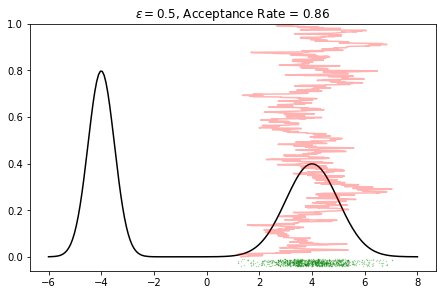

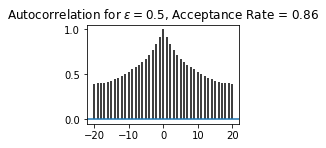

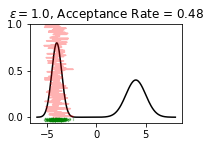

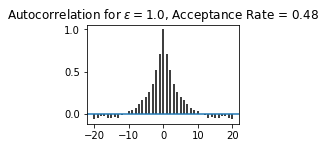

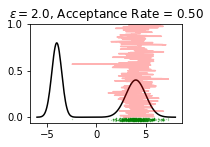

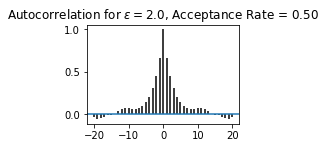

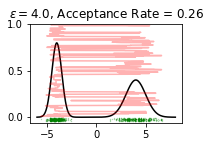

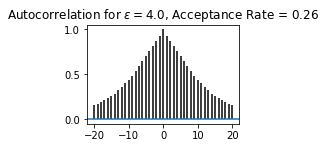

In [11]:
import scipy.stats as sts
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

def p_pdf(x):
    '''Proposal distribution.'''
    return (sts.norm(-4, 0.5).pdf(x) + sts.norm(4, 1).pdf(x))

# Global parameter
iterations = 1000

def run_metropolis(target_pdf, epsilon):
    '''Run the Metropolis-Hastings algorithm for the target pdf and epsilon.'''
    samples = np.zeros(iterations)          # storage vector
    current_sample = sts.norm(0, 3).rvs()   # initial stage
    isAccepted = np.zeros(iterations)
    
    for i in range(iterations):
        draw = sts.norm.rvs(current_sample, epsilon)
        acceptance_prob = target_pdf(draw) / target_pdf(current_sample)
        if acceptance_prob >= 1 or np.random.random_sample() < acceptance_prob:
            current_sample = draw
            isAccepted[i] = 1
        samples[i] = current_sample
    return(samples, isAccepted)  
    
plt.figure(figsize=(16,10))

'''
Plot the autocorrelation function for a series x. This corresponds to the
acf() function in R. The series x is detrended by subtracting the mean of
the series before computing the autocorrelation.
The autocorrelation at lag = 0 is always 1 since the series is perfectly
correlated with itself. You can ignore this value. The autocorrelation at
all other values should be as small as possible, since independent samples
have no correlation.
'''

def plot_acf(x):
    plt.acorr(x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))

for i, epsilon in enumerate([0.5, 1, 2, 4]):
    samples, isAccepted = run_metropolis(p_pdf, epsilon)
    x = np.linspace(-6, 8, 200)
    
    plt.subplot(2, 2, i+1)
    plt.plot(x, p_pdf(x), color="black")
    plt.plot(samples, sts.uniform.rvs(loc=-0.04, scale=0.03, size=iterations), 
             'gx', markersize = 0.8, alpha=0.3)
    plt.plot(samples, np.linspace(0, 1, iterations), alpha=0.3, color="red")
    plt.title(r'$\epsilon = {:.1f}$, Acceptance Rate = {:.2f}'.format(epsilon, np.mean(isAccepted)))
    plt.ylim([-0.06, 1])
    plt.show()
    
    plt.subplot(2, 2, i+1)
    plot_acf(samples)
    plt.title(r'Autocorrelation for $\epsilon = {:.1f}$, Acceptance Rate = {:.2f}'.format(epsilon, np.mean(isAccepted)))
    plt.show()

### Discussion

Clearly, the best $\epsilon$ is 4.0; while the acceptance rate is lower, our samples (next step in the work) better reflect the true distribution.